## HMM (Hidden Markov Model) para diagnóstico diferencial

Doenças ocultas (COVID, gripe, pneumonia), sintomas observáveis ao longo do tempo.

In [ ]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 3.3 MB/s eta 0:00:00


In [ ]:
!pip install hmmlearn graphviz pydot

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from hmmlearn import hmm
from hmmlearn.hmm import CategoricalHMM

In [ ]:
# --------------------------------------
# 1. Definição dos sintomas observáveis
# --------------------------------------
# Cada número representa uma combinação de sintomas:
# 0: Nenhum sintoma
# 1: Febre
# 2: Tosse
# 3: Falta de ar
# 4: Febre + Tosse
# 5: Febre + Falta de ar
# 6: Tosse + Falta de ar
# 7: Febre + Tosse + Falta de ar

n_observations = 8
n_states = 3  # Gripe, COVID-19, Pneumonia


In [ ]:
# --------------------------------------
# 2. Modelo HMM com distribuição discreta
# --------------------------------------
model = CategoricalHMM(n_components=3, n_iter=100, random_state=42)


In [ ]:
# --------------------------------------
# 3. Probabilidades iniciais dos estados
# --------------------------------------
# Hipótese: COVID-19 está mais prevalente
model.startprob_ = np.array([0.3, 0.5, 0.2])  # Gripe, COVID-19, Pneumonia


In [ ]:
# --------------------------------------
# 4. Matriz de transição entre estados
# --------------------------------------
# Probabilidade de passar de uma doença para outra (ou permanecer)
model.transmat_ = np.array([
    [0.6, 0.3, 0.1],  # Gripe
    [0.2, 0.7, 0.1],  # COVID-19
    [0.1, 0.3, 0.6],  # Pneumonia
])


In [ ]:
# --------------------------------------
# 5. Matriz de emissão (sintomas por doença)
# --------------------------------------
# Cada linha = doença (estado oculto)
# Cada coluna = probabilidade de observar um sintoma
model.emissionprob_ = np.array([
    # Gripe
    [0.1, 0.3, 0.3, 0.05, 0.15, 0.05, 0.03, 0.02],
    # COVID-19
    [0.05, 0.25, 0.2, 0.1, 0.2, 0.05, 0.1, 0.05],
    # Pneumonia
    [0.05, 0.1, 0.1, 0.3, 0.1, 0.15, 0.1, 0.1]
])

In [ ]:
# --------------------------------------
# 6. Simulação de uma sequência de sintomas (exemplo)
# --------------------------------------
# Ex: Paciente apresenta febre + tosse, depois só febre, depois falta de ar
observed_symptoms = np.array([[4], [1], [3]])  # Usamos colunas


In [ ]:
# --------------------------------------
# 7. Inferência: qual a sequência mais provável de doenças?
# --------------------------------------
logprob, hidden_states = model.decode(observed_symptoms, algorithm="viterbi")

estado_nome = ["Gripe", "COVID-19", "Pneumonia"]

print("\nSintomas observados:")
for s in observed_symptoms.flatten():
    print(f" - {s}")

print("\nEstados inferidos (doenças):")
for i, state in enumerate(hidden_states):
    print(f"Passo {i+1}: {estado_nome[state]}")


Sintomas observados:
 - 4
 - 1
 - 3

Estados inferidos (doenças):
Passo 1: COVID-19
Passo 2: COVID-19
Passo 3: COVID-19


In [ ]:
# Gráfico de transições do HMM
# --- Estados (doenças) e observações (sintomas) ---
estado_nome = ["Gripe", "COVID-19", "Pneumonia"]
sintoma_nome = [
    "Sem sintomas", "Febre", "Tosse", "Falta de ar",
    "Febre+Tosse", "Febre+FaltaAr", "Tosse+FaltaAr", "Febre+Tosse+FaltaAr"
]


In [ ]:
model = CategoricalHMM(n_components=3, n_iter=100, init_params="")  # init_params="" evita sobrescrever manual

model.startprob_ = np.array([0.3, 0.5, 0.2])  # Gripe, COVID-19, Pneumonia

model.transmat_ = np.array([
    [0.6, 0.3, 0.1],
    [0.2, 0.7, 0.1],
    [0.1, 0.3, 0.6]
])

model.emissionprob_ = np.array([
    [0.1, 0.3, 0.3, 0.05, 0.15, 0.05, 0.03, 0.02],  # Gripe
    [0.05, 0.25, 0.2, 0.1, 0.2, 0.05, 0.1, 0.05],   # COVID-19
    [0.05, 0.1, 0.1, 0.3, 0.1, 0.15, 0.1, 0.1]      # Pneumonia
])


In [ ]:
# --- Gráfico com NetworkX ---
G = nx.DiGraph()

# Adiciona estados (doenças) como nós
for i, estado in enumerate(estado_nome):
    G.add_node(estado)

In [ ]:
# Adiciona transições com pesos (probabilidades)
for i, origem in enumerate(estado_nome):
    for j, destino in enumerate(estado_nome):
        prob = model.transmat_[i][j]
        if prob > 0.05:
            G.add_edge(origem, destino, weight=prob)


In [ ]:
# Plotar o grafo
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
edges = G.edges(data=True)


<Figure size 1000x600 with 0 Axes>

{'Gripe': Text(-0.35611343086202707, 1.0, 'Gripe'),
 'COVID-19': Text(0.858652935416101, -0.004647063006833648, 'COVID-19'),
 'Pneumonia': Text(-0.5025395045540744, -0.9953529369931667, 'Pneumonia')}

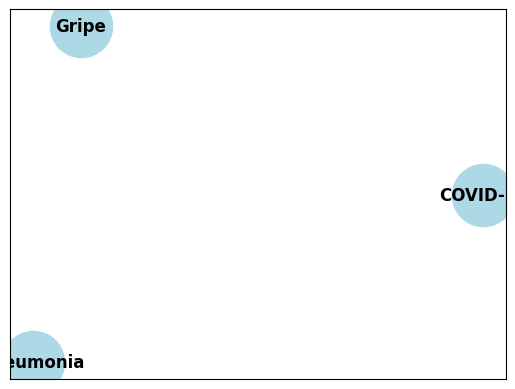

In [ ]:
# Desenha os nós (estados)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')


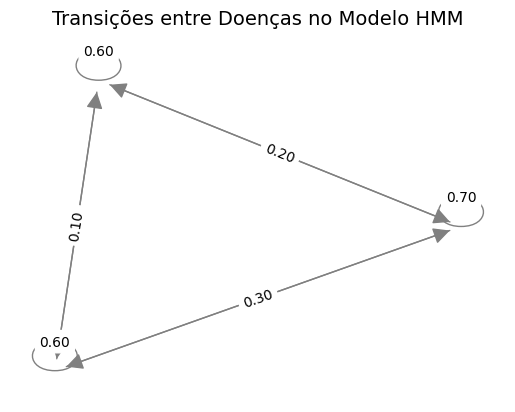

In [ ]:
# Desenha as arestas com pesos
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=25, edge_color='gray')
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Transições entre Doenças no Modelo HMM", fontsize=14)
plt.axis('off')
plt.show()

In [ ]:
# --- Nome dos estados e sintomas ---
estado_nome = ["Gripe", "COVID-19", "Pneumonia"]
sintoma_nome = [
    "Sem sintomas", "Febre", "Tosse", "Falta de ar",
    "Febre+Tosse", "Febre+FaltaAr", "Tosse+FaltaAr", "Febre+Tosse+FaltaAr"
]

# --- Probabilidades de emissão (já configuradas no modelo) ---
emission_probs = model.emissionprob_

<ipython-input-35-beaf0283e6bb>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sintoma_nome, rotation=45, ha='right')
<ipython-input-35-beaf0283e6bb>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sintoma_nome, rotation=45, ha='right')
<ipython-input-35-beaf0283e6bb>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sintoma_nome, rotation=45, ha='right')


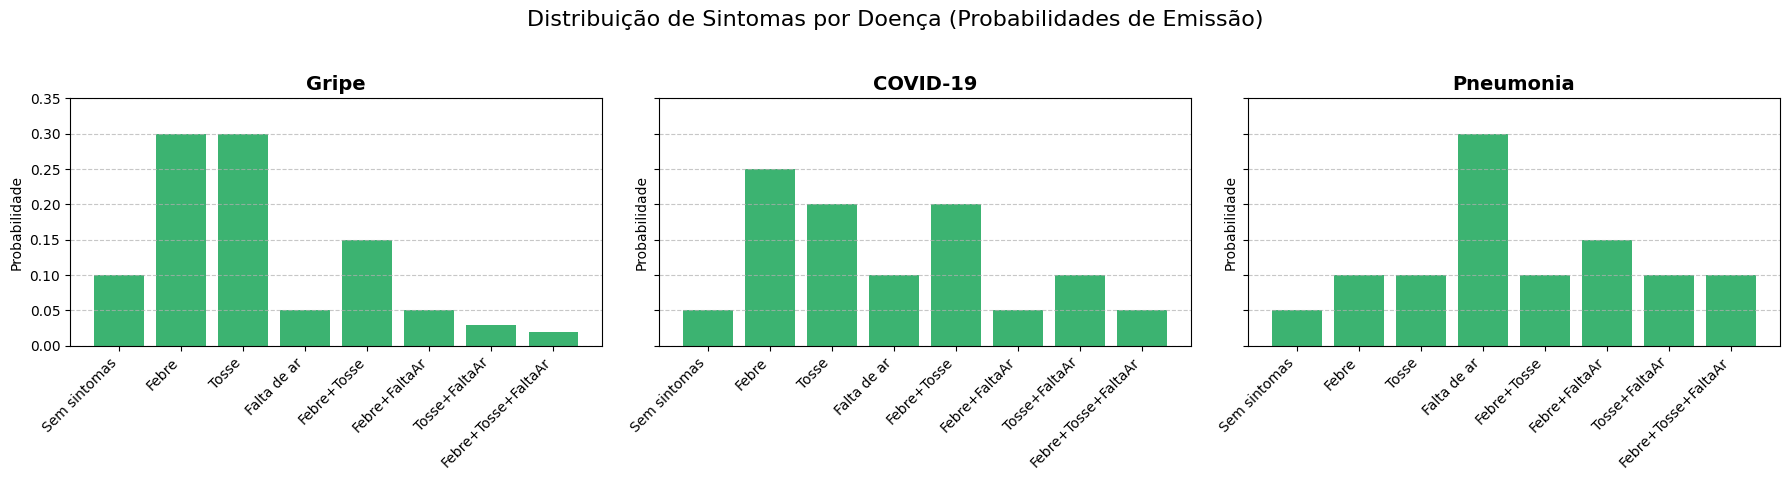

In [ ]:
# --- Plotar ---
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, ax in enumerate(axs):
    ax.bar(sintoma_nome, emission_probs[i], color='mediumseagreen')
    ax.set_title(f"{estado_nome[i]}", fontsize=14, fontweight='bold')
    ax.set_xticklabels(sintoma_nome, rotation=45, ha='right')
    ax.set_ylim(0, 0.35)
    ax.set_ylabel("Probabilidade")
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

fig.suptitle("Distribuição de Sintomas por Doença (Probabilidades de Emissão)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()